In [2]:
import numpy as np
import pyaudio
import time
from pyldpc import make_ldpc, encode, decode, get_message
import matplotlib.pyplot as plt 

# Ses kayıt parametreleri

FORMAT = pyaudio.paInt16
CHANNELS = 1
# Parametreleri tanımla
chunk = 512
CHUNK = chunk
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 1000  # Frekans sapması (Hz)


# LDPC kodlama parametreleri
n = 32
d_v = 5
d_c = 8
snr = 1000
H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
k = G.shape[1]
print(k)
#y = encode(G, v, snr)
# PyAudio nesnesi oluştur
p = pyaudio.PyAudio()
# Çıkış akışını aç
stream = p.open(
format=FORMAT,
channels=CHANNELS,
rate=rate,
output=True,
frames_per_buffer=CHUNK
    )

bitler=[]
def kodla(G,v,snr):
    global bitler
    y = encode(G, v, snr)
    binary_dizi = np.where(y < 0, 0, 1)  # Değişkeni burada tanımla
    bitler=binary_dizi
    return binary_dizi

def ses_gonder(bits,fc,kf,t,A,G,snr=20):
    data=kodla(G,bits,snr)
    m = np.repeat(data, CHUNK // len(data))
    
    # FM modülasyonunu uygula
    s = A * np.cos(2 * np.pi * (fc + kf * m) * t)*32767

    # Modüle edilmiş dalgayı ses cihazına gönderme
    stream.write(s.astype(np.int16).tobytes())

def onluk_binarye_cevir(onluk_sayi,G,snr=20):
  """Verilen onluk sayıyı 16 bitlik bir binary diziye çevirir.

  Args:
      onluk_sayi: Dönüştürülecek onluk sayı.

  Returns:
      16 bitlik binary dizi (liste).
  """
  binary_dizi = np.array([int(bit) for bit in bin(onluk_sayi)[2:].zfill(16)])
  binary_dizi=kodla(G,binary_dizi,snr)
  
  return binary_dizi


# Kullanım örneği:
v = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,1], dtype=np.int16)
sayac=0
for i in range(100):
        
            #v=onluk_binarye_cevir(i,G,snr)
            #print(v)
            #sayac+=1
            ses_gonder(v,fc,kf,t,A,G,snr)  # Veriyi ses olarak gönder      
            #time.sleep(0.002)
# Akışı kapat
stream.stop_stream()
stream.close()
p.terminate()

16


ALSA lib pcm_dsnoop.c:601:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm_dmix.c:1032:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib pcm_dmix.c:1032:(snd_pcm_dmix_open) unable to open slave


In [179]:
onluk_binarye_cevir(8)

TypeError: onluk_binarye_cevir() missing 1 required positional argument: 'G'

print(len(sound_bits))


>>> import numpy as np
>>> from pyldpc import make_ldpc, encode, decode, get_message
>>> n = 32
>>> d_v = 4
>>> d_c = 8
>>> snr = 1000
>>> H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
>>> k = G.shape[1]
>>> v = np.random.randint(2, size=k)
>>> y = encode(G, v, snr)
>>> d = decode(H, y, snr)
>>> x = get_message(G, d)
>>> assert abs(x - v).sum() == 0

print(len(y))

print(len(v))

n = 32
d_v = 8
d_c = 16
snr = 20
H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
k = G.shape[1]

d = decode(H, y, 20)
x = get_message(G, d)
x


print(len(y))

y

In [200]:
bitler#=[1,1, 1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [149]:
bitler=np.array(bitler)
bitler=np.where(bitler==0,-1,1)
d = decode(H, bitler, snr)
x= get_message(G, d)



In [150]:
x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

aci = np.arcsin(0.5)  

In [19]:
modüle_edilmis_dalga

array([    -0.        , -21417.70013415, -32418.20922816, ...,
       -25324.60528974,  -5574.95445348,  16886.25575742])

In [203]:
m2=modüle_edilmis_dalga/32767

NameError: name 'modüle_edilmis_dalga' is not defined

In [228]:
snr=20
for n in range(100):
    for d_v in range(100):
        for d_c in range(100):
            try:
                H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
                k = G.shape[1]
                if k==16:
                    print(n,d_v,d_c)

            except:
                    continue
k

17 2 17
17 3 17
17 4 17
17 5 17
17 6 17
17 7 17
17 8 17
17 9 17
17 10 17
17 11 17
17 12 17
17 13 17
17 14 17
17 15 17
17 16 17
20 3 10
21 2 7
22 5 11
24 7 12
25 2 5
26 9 13
27 5 9
28 11 14
30 13 15
32 5 8
32 15 16
33 8 11
35 3 5
39 11 13
42 5 7
44 9 11
45 2 3
45 7 9
45 14 15
56 3 4
56 13 14
65 4 5
65 12 13
72 5 6
72 11 12
77 6 7
77 10 11
80 7 8
80 9 10
81 8 9


98

In [202]:
t = np.arange(0, 2048) / RATE
tasiyici_dalga = np.sin(2 * np.pi * 5000 * t)
tasiyici_dalga=np.where(tasiyici_dalga==0,1e-10,tasiyici_dalga)




NameError: name 'RATE' is not defined

In [26]:
genis_veri=(m2/tasiyici_dalga +1)/2
genis_veri=np.where(genis_veri <=0,-1,genis_veri)


In [201]:
a=al(genis_veri)

a


NameError: name 'genis_veri' is not defined

In [200]:
def al(data):
	n = 33
	d_v = 2
	d_c = 33
	snr = 20
	H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
	gruplar = [data[i:i+64] for i in range(0, len(data), 64)]
	ana_ort=np.abs(np.mean(data))
	ortalamalar =[]
	
	for grup in gruplar:
		ortalama=np.mean(grup)
		if ortalama <=0:
			ortalamalar.append(ortalama)
		else:
			ortalamalar.append(ortalama)
	ortalamalar=np.array(ortalamalar)	
	#print(ortalamalar[0])	
	d = decode(H, ortalamalar, snr)
	x=get_message(G, d)
			
	return x

In [198]:
def kodla(data, n=33, d_v=2, d_c=33):
  """Verilen verileri LDPC kodu ile kodlar.

  Args:
      data: Kodlanacak veri dizisi.
      n: Toplam bit sayısı.
      d_v: Doğrultulu düğüm derecesi.
      d_c: Kontrol düğüm derecesi.

  Returns:
      Kodlanmış veri dizisi.
  """
  H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)  # LDPC matrislerini oluştur
  codeword = encode(G, data,snr=20)  # Veriyi kodla
  return codeword

In [199]:

bits =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,0]
kod=kodla(bits)

tasiyici_frekans = 2000

ValueError: shapes (33,32) and (16,) not aligned: 32 (dim 1) != 16 (dim 0)

In [191]:

# Veriyi genişlet (CHUNK uzunluğunda)
genisletilmis_veri = np.repeat(bits, 512 // len(bits))

t = np.arange(0, len(genisletilmis_veri)) / RATE
sinyal = np.sin(2 * np.pi * tasiyici_frekans * t)

m = np.cos(tasiyici_dalga * (genisletilmis_veri *2*t))


In [186]:
# Parametreleri tanımla
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 1  # Modüle edici sinyal frekansı (Hz)
fs = 44100 # Örnekleme frekansı (Hz)
t = np.arange(0, 512)/fs  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 10  # Frekans sapması (Hz)

# Modüle edici sinyali oluştur
m = genisletilmis_veri = np.repeat(bits, 512 // len(bits))#A * np.sin(2 * np.pi * fm * t)

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * fc * t + kf * np.cumsum(m))

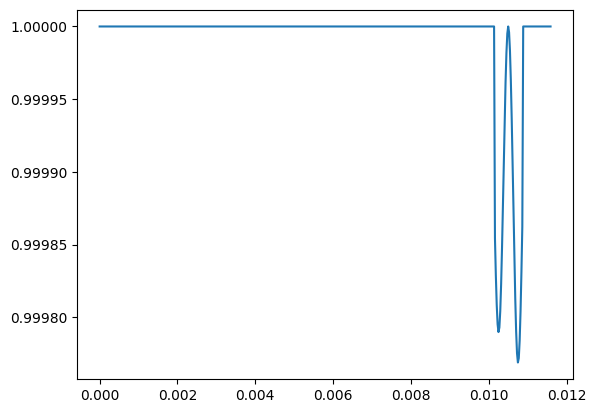

In [192]:
plt.plot(t,m)

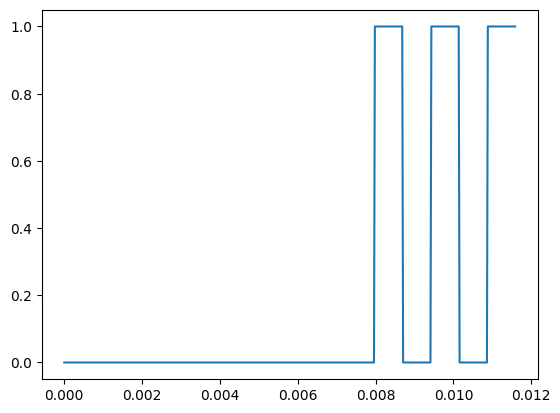

In [118]:
plt.plot(t,genisletilmis_veri)

In [87]:
genisletilmis_veri

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

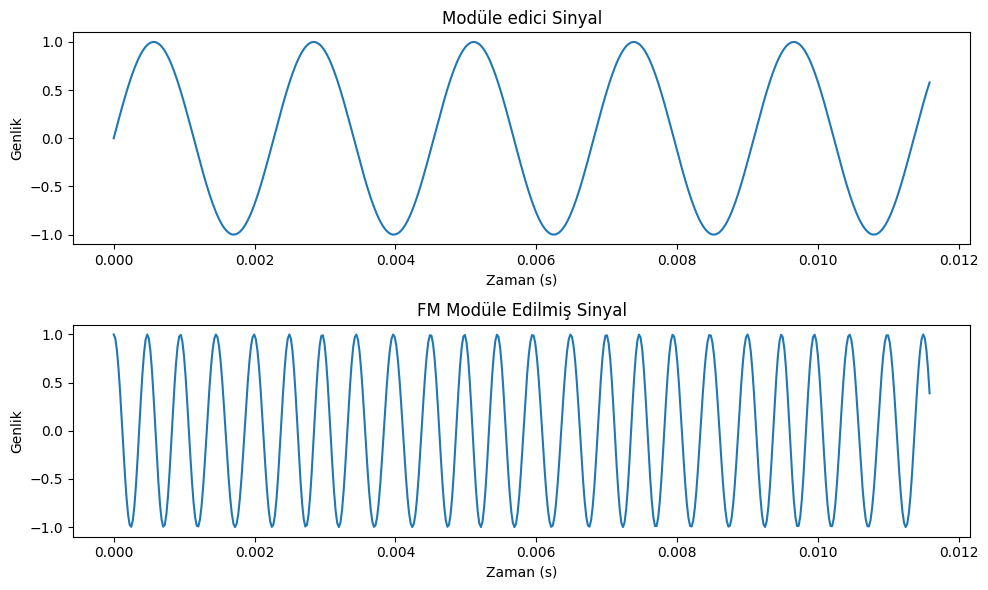

In [193]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 1000  # Frekans sapması (Hz)

# Modüle edici sinyali oluştur
m = A * np.sin(2 * np.pi * fm * t)

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * fc * t + kf * np.cumsum(m) / rate)

# Sinyalleri çiz
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, m)
plt.title('Modüle edici Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(2, 1, 2)
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.tight_layout()
plt.show()

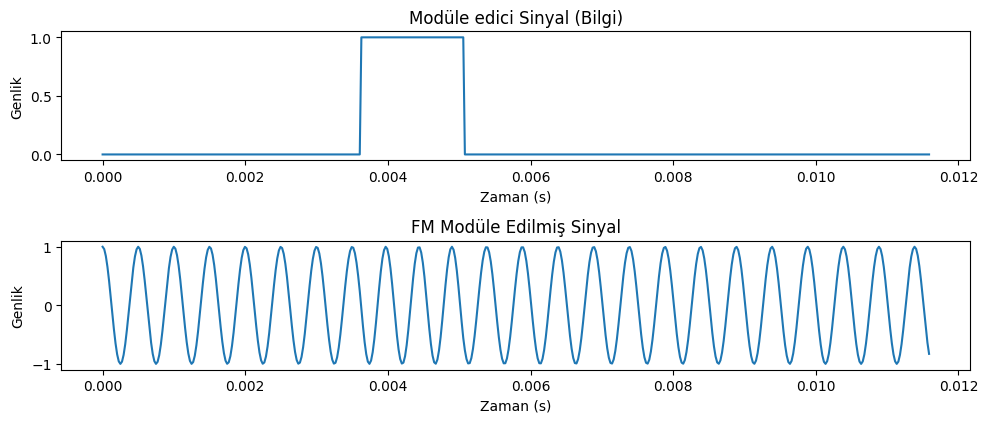

In [202]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 1000  # Frekans sapması (Hz)



# Modüle edilecek bilgiyi tanımla
data = [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

# Bilgiyi modüle edici sinyale dönüştür
m = np.zeros_like(t)
for i in range(len(data)):
    start_idx = int(i * chunk / len(data))
    end_idx = int((i + 1) * chunk / len(data))
    # Değişiklik burada:
    m[start_idx:end_idx] = data[i] * A

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * fc * t + kf * np.cumsum(m) / rate)

# Sinyalleri çiz
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, m)
plt.title('Modüle edici Sinyal (Bilgi)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(3, 1, 2)
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')



plt.tight_layout()
plt.show()

In [203]:
m

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0.

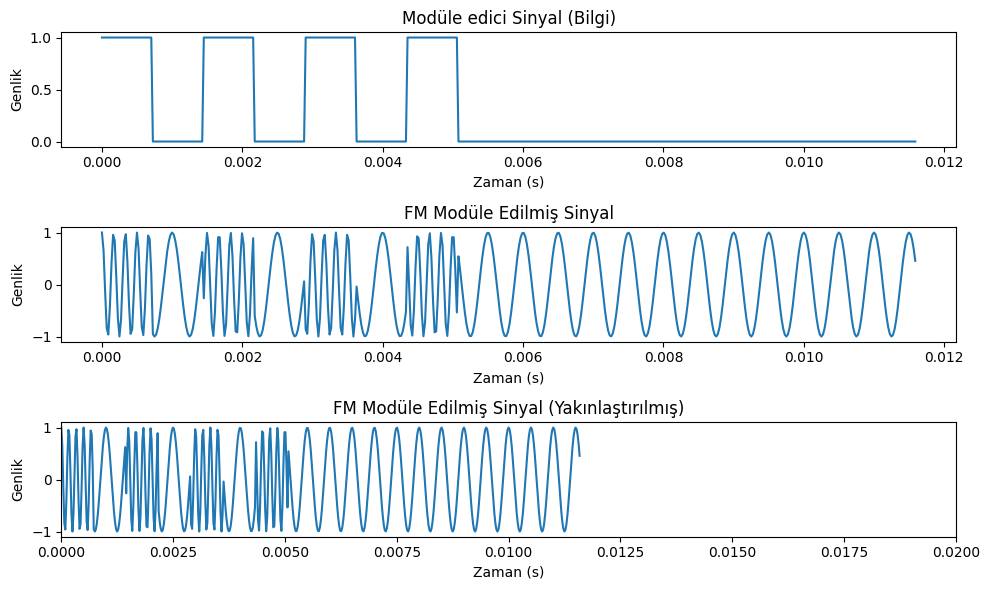

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 4000  # Frekans sapması (Hz)

# Modüle edilecek bilgiyi tanımla
data = [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

# Bilgiyi modüle edici sinyale dönüştür
m = np.zeros_like(t)
for i in range(len(data)):
    start_idx = int(i * chunk / len(data))
    end_idx = int((i + 1) * chunk / len(data))
    # Değişiklik burada:
    m[start_idx:end_idx] = data[i] 

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * (fc + kf * m) * t)  # Değişiklik burada

# Sinyalleri çiz
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, m)
plt.title('Modüle edici Sinyal (Bilgi)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(3, 1, 2)
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(3, 1, 3)
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal (Yakınlaştırılmış)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')
plt.xlim(0, 0.02)  # İlk 20 ms'i yakınlaştır

plt.tight_layout()
plt.show()

In [211]:
s

array([ 1.        ,  0.65632781, -0.13846762, -0.8380881 , -0.96165344,
       -0.42423168,  0.40478334,  0.95557281,  0.84955467,  0.1595999 ,
       -0.64005497, -0.99977164, -0.67230089,  0.1172721 ,  0.82623877,
        0.96729486,  0.44348626, -0.38515014, -0.94905575, -0.86063322,
       -0.18065928,  0.6234898 ,  0.99908667,  0.68796692, -0.09602303,
       -0.81401209, -0.97249451, -0.46253829,  0.36534102,  0.94210524,
        0.8713187 ,  0.20163615, -0.9534488 , -0.99977164, -0.96546335,
       -0.85329088, -0.67230089, -0.43709014, -0.16662826,  0.1172721 ,
        0.39171453,  0.63456535,  0.82623877,  0.95127641,  0.99959404,
        0.96729486,  0.8569838 ,  0.67755737,  0.44348626,  0.17364818,
       -0.11019455, -0.38515014, -0.62904354, -0.82220487, -0.94905575,
       -0.99936571, -0.96907729, -0.86063322, -0.68277947, -0.44985987,
       -0.18065928,  0.1031114 ,  0.3785662 ,  0.6234898 , -0.26397612,
        0.55445913,  0.99179001,  0.7474196 , -0.01068549, -0.76

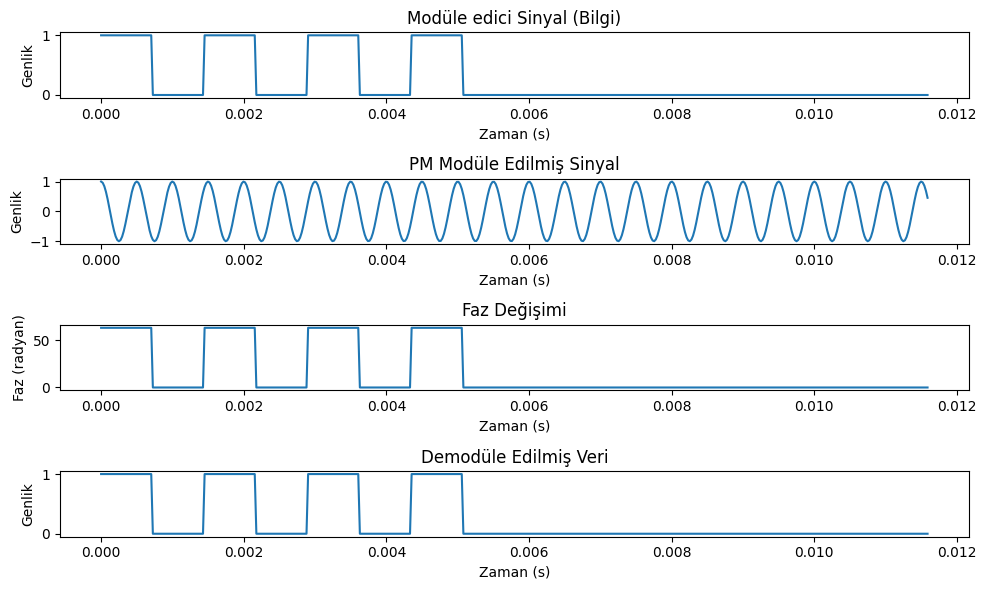

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kp = 2 * np.pi * 10  # Faz sapması (radyan)

# Modüle edilecek bilgiyi tanımla
data = [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

# Bilgiyi modüle edici sinyale dönüştür
m = np.zeros_like(t)
for i in range(len(data)):
    start_idx = int(i * chunk / len(data))
    end_idx = int((i + 1) * chunk / len(data))
    m[start_idx:end_idx] = data[i]

# PM modülasyonunu uygula
s = A * np.cos(2 * np.pi * fc * t + kp * m) 

# Faz Değişimini Hesaplama (PM için)
phase_change = kp * m 

# PM Demodülasyonu (Değişiklik burada!)
demodulated_data = phase_change / kp  # kp ile bölün

# Sinyalleri çiz
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(t, m)
plt.title('Modüle edici Sinyal (Bilgi)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(4, 1, 2)
plt.plot(t, s)
plt.title('PM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(4, 1, 3)
plt.plot(t, phase_change)
plt.title('Faz Değişimi')
plt.xlabel('Zaman (s)')
plt.ylabel('Faz (radyan)')

plt.subplot(4, 1, 4)
plt.plot(t, demodulated_data)
plt.title('Demodüle Edilmiş Veri')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.tight_layout()
plt.show()

In [225]:
m

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

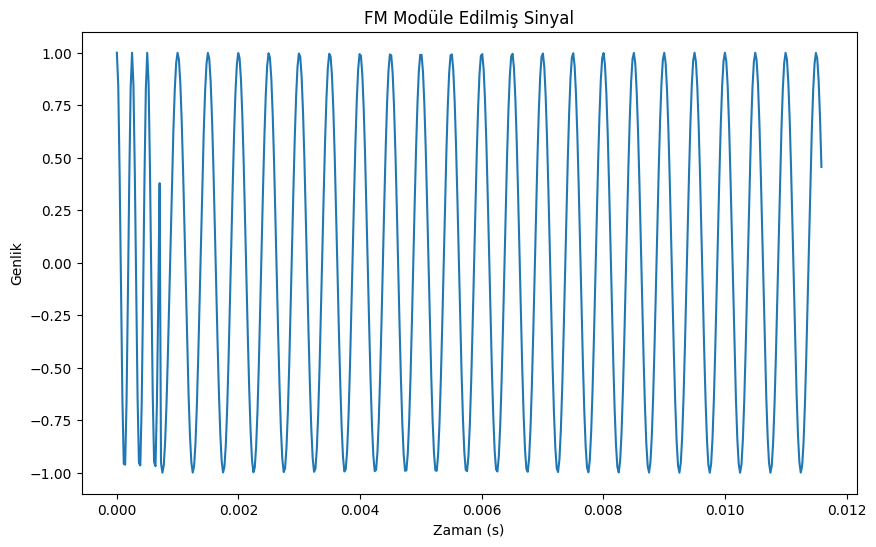

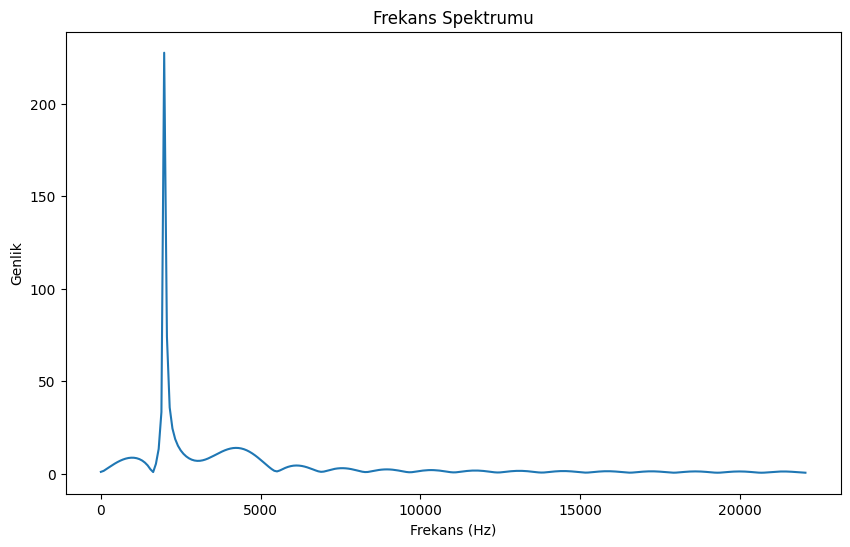

In [216]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 2000  # Frekans sapması (Hz)

# Modüle edilecek bilgiyi tanımla
data = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

# Bilgiyi modüle edici sinyale dönüştür
m = np.zeros_like(t)
for i in range(len(data)):
    start_idx = int(i * chunk / len(data))
    end_idx = int((i + 1) * chunk / len(data))
    m[start_idx:end_idx] = data[i] 

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * (fc + kf * m) * t)

# Demodülasyon:
# 1. FFT hesapla:
frekans = np.fft.rfftfreq(len(s), 1/rate)
spektrum = np.fft.rfft(s)

# 2. Taşıyıcı sinyalin frekansı etrafındaki bölgeyi bul:
# (Bu örnekte, taşıyıcı frekans etrafında 100 Hz'lik bir bölge seçiliyor)
frekans_aralık = (frekans > fc - 100) & (frekans < fc + 100) 
spektrum_aralik = spektrum[frekans_aralık]
frekans_aralik = frekans[frekans_aralık]

# 3. Maksimum genlikli frekansı bul:
en_yüksek_genlik_indeksi = np.argmax(np.abs(spektrum_aralik))
en_yüksek_frekans = frekans_aralik[en_yüksek_genlik_indeksi]

# 4. Frekans kaymasının yönünü belirle:
# (Eğer en yüksek genlikli frekans taşıyıcı frekansından büyükse, 1 bit, 
#  küçükse 0 bit olarak kabul edilebilir)
bit = 1 if en_yüksek_frekans > fc else 0

# ... (Bu işlemi her bit için tekrarla) ...

# Demodüle edilmiş veriyi çiz:
plt.figure(figsize=(10, 6))
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.figure(figsize=(10, 6))
plt.plot(frekans, np.abs(spektrum))
plt.title('Frekans Spektrumu')
plt.xlabel('Frekans (Hz)')
plt.ylabel('Genlik')

plt.show()

In [220]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 1024
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 1000  # Frekans sapması (Hz)

# Modüle edilecek bilgiyi tanımla
data = [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

# Bilgiyi modüle edici sinyale dönüştür
m = np.zeros_like(t)
for i in range(len(data)):
    start_idx = int(i * chunk / len(data))
    end_idx = int((i + 1) * chunk / len(data))
    m[start_idx:end_idx] = data[i] 

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * (fc + kf * m) * t)

# Demodülasyon:
demodulated_data = []
for i in range(len(data)):
    # Her bit için sinyal kesiti al:
    start_idx = int(i * chunk / len(data))
    end_idx = int((i + 1) * chunk / len(data))
    s_kesit = s[start_idx:end_idx]

    # FFT hesapla:
    frekans = np.fft.rfftfreq(len(s_kesit), 1/rate)
    spektrum = np.fft.rfft(s_kesit)

    # Taşıyıcı frekans etrafındaki bölgeyi bul:
    frekans_aralık = (frekans > fc - 100) & (frekans < fc + 100) 
    spektrum_aralik = spektrum[frekans_aralık]
    frekans_aralik = frekans[frekans_aralık]

    # Maksimum genlikli frekansı bul:
    en_yüksek_genlik_indeksi = np.argmax(np.abs(spektrum_aralik))
    en_yüksek_frekans = frekans_aralik[en_yüksek_genlik_indeksi]

    # Frekans kaymasının yönünü belirle:
    bit = 1 if en_yüksek_frekans > fc else 0

    demodulated_data.append(bit)

# Sonuçları yazdır:
print("Orijinal Veri:", data)
print("Demodüle Edilmiş Veri:", demodulated_data)

Orijinal Veri: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Demodüle Edilmiş Veri: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


1981.0546875
Frekans Daralmaları:
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]

Veri Sayıları:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


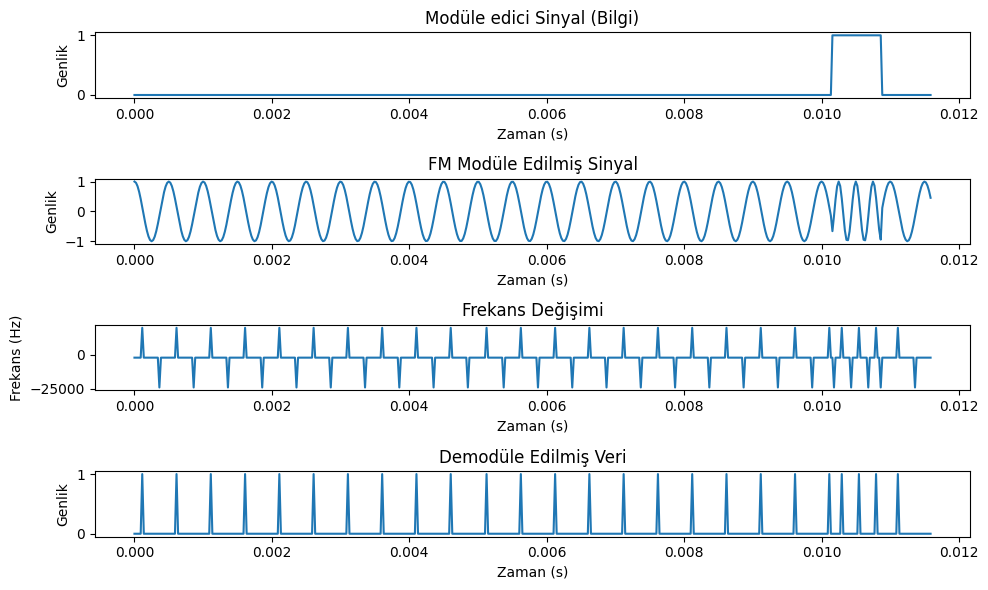

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 2000  # Frekans sapması (Hz)

# Modüle edilecek bilgiyi tanımla
data = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0] 
bits=data
m = np.repeat(data, chunk // len(bits))

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * (fc + kf * m) * t)

# FM demodülasyonunu uygula
# 1. Frekansı tahmin etme:
estimated_fc = np.diff(np.unwrap(np.angle(s))) * rate / (2 * np.pi)
# 2. Frekans değişimini hesaplama:
frequency_change = estimated_fc - fc
# **Boyut eşleştirme:**
frequency_change = np.append(frequency_change, frequency_change[-1])

# 3. Veriyi geri kazanma:
# Eşik değeri kullanarak veriyi geri kazan:
threshold = np.mean(frequency_change)  # Frekans değişiminin ortalamasını eşik değeri olarak kullan
demodulated_data = (frequency_change > threshold).astype(int)
frekans = np.fft.rfftfreq(len(s), 1/rate)
spektrum = np.fft.rfft(s)
frekans_peak = frekans[np.argmax(np.abs(spektrum))]
#print(np.argmax(np.abs(spektrum)))
print(frekans_peak)
# Daralan frekansları ve sayılarını belirleme
frekans_daralmaları = []
sayilar = []

daralma_baslangici = False
daralma_sayisi = 0
for i in range(len(frequency_change) - 1):
  if frequency_change[i] > threshold and not daralma_baslangici:  # Daralma başlangıcı
    daralma_baslangici = True
    daralma_sayisi = 1
  elif frequency_change[i] > threshold and daralma_baslangici:  # Daralma devam ediyor
    daralma_sayisi += 1
  elif frequency_change[i] <= threshold and daralma_baslangici:  # Daralma sonu
    frekans_daralmaları.append(frequency_change[i - daralma_sayisi:i])
    sayilar.append(daralma_sayisi)
    daralma_baslangici = False

# Son bir daralma varsa, onu ekle
if daralma_baslangici:
  frekans_daralmaları.append(frequency_change[i - daralma_sayisi:i+1])
  sayilar.append(daralma_sayisi)

# Çıktıları yazdır
print("Frekans Daralmaları:")
for daralma in frekans_daralmaları:
  print(daralma)

print("\nVeri Sayıları:")
print(sayilar)

# Sinyalleri çiz
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(t, m)
plt.title('Modüle edici Sinyal (Bilgi)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(4, 1, 2)
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(4, 1, 3)
plt.plot(t, frequency_change)
plt.title('Frekans Değişimi')
plt.xlabel('Zaman (s)')
plt.ylabel('Frekans (Hz)')

plt.subplot(4, 1, 4)
plt.plot(t, demodulated_data)
plt.title('Demodüle Edilmiş Veri')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.tight_layout()
plt.show()

In [82]:
frekans = np.fft.rfftfreq(len(s), 1/rate)
spektrum = np.fft.rfft(s)
frekans_peak = frekans[np.argmax(np.abs(spektrum))]
print(np.argmax(np.abs(spektrum)))

23


In [83]:
frekans_peak

1981.0546875

In [84]:
periyot=1/1981
periyot

0.0005047955577990914

In [85]:
512/44100

0.011609977324263039

In [88]:

ilk=s[0]
degisim=1
sayi=1
tepe=0
cukur=0
inc=False
dec=False
sayac=0
for i in range(len(s)-1):
    fark=s[i+1]-s[i]

    if fark <0:
        dec=True
        inc=False
        sayi=1

    elif fark==0:
        print("sabit")

    else:
        dec=False
        inc=True
        sayi=-1


    if degisim*sayi<0:
        degisim=sayi
        
        if inc:
            cukur+=1

        else:
            tepe+=1

    if cukur+tepe>=3:
        cukur=0
        tepe=0
        sayac+=1
print(sayac)


    
    

16


In [42]:
print(len(s))

512


1981.0546875
Frekans Daralmaları:
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]

Veri Sayıları:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


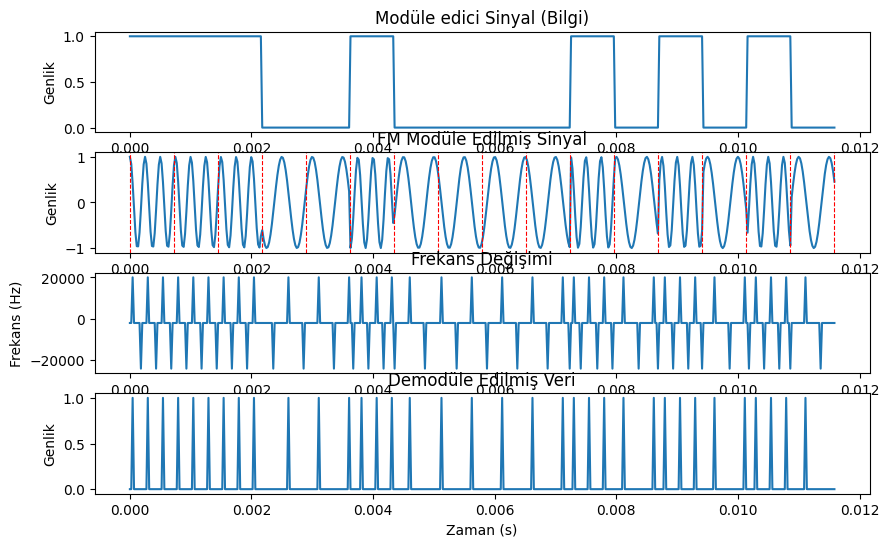

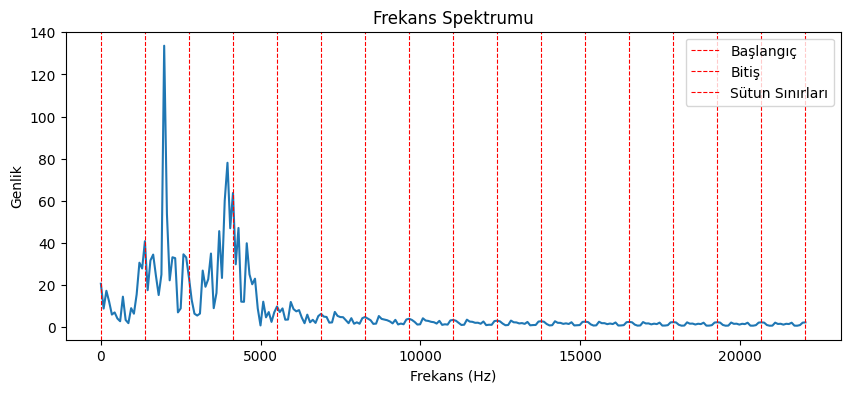

In [144]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 2000  # Frekans sapması (Hz)

# Modüle edilecek bilgiyi tanımla
data = [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0] 
bits=data
m = np.repeat(data, chunk // len(bits))

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * (fc + kf * m) * t)

# FM demodülasyonunu uygula
# 1. Frekansı tahmin etme:
estimated_fc = np.diff(np.unwrap(np.angle(s))) * rate / (2 * np.pi)
# 2. Frekans değişimini hesaplama:
frequency_change = estimated_fc - fc
# **Boyut eşleştirme:**
frequency_change = np.append(frequency_change, frequency_change[-1])

# 3. Veriyi geri kazanma:
# Eşik değeri kullanarak veriyi geri kazan:
threshold = np.mean(frequency_change)  # Frekans değişiminin ortalamasını eşik değeri olarak kullan
demodulated_data = (frequency_change > threshold).astype(int)
frekans = np.fft.rfftfreq(len(s), 1/rate)
spektrum = np.fft.rfft(s)
frekans_peak = frekans[np.argmax(np.abs(spektrum))]
#print(np.argmax(np.abs(spektrum)))
print(frekans_peak)
# Daralan frekansları ve sayılarını belirleme
frekans_daralmaları = []
sayilar = []

daralma_baslangici = False
daralma_sayisi = 0
for i in range(len(frequency_change) - 1):
  if frequency_change[i] > threshold and not daralma_baslangici:  # Daralma başlangıcı
    daralma_baslangici = True
    daralma_sayisi = 1
  elif frequency_change[i] > threshold and daralma_baslangici:  # Daralma devam ediyor
    daralma_sayisi += 1
  elif frequency_change[i] <= threshold and daralma_baslangici:  # Daralma sonu
    frekans_daralmaları.append(frequency_change[i - daralma_sayisi:i])
    sayilar.append(daralma_sayisi)
    daralma_baslangici = False

# Son bir daralma varsa, onu ekle
if daralma_baslangici:
  frekans_daralmaları.append(frequency_change[i - daralma_sayisi:i+1])
  sayilar.append(daralma_sayisi)

# Çıktıları yazdır
print("Frekans Daralmaları:")
for daralma in frekans_daralmaları:
  print(daralma)

print("\nVeri Sayıları:")
print(sayilar)

# Sinyalleri çiz
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(t, m)
plt.title('Modüle edici Sinyal (Bilgi)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(4, 1, 2)
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

# Başlangıç ve bitiş çizgilerini çiz
plt.axvline(x=t[0], color='red', linestyle='--', linewidth=0.8, label='Başlangıç')
plt.axvline(x=t[-1], color='red', linestyle='--', linewidth=0.8, label='Bitiş')

# Ortasını 16 parçaya bölme
sutun_sayisi = 16
sutun_genisligi = (t[-1] - t[0]) / sutun_sayisi  # Zaman eksenindeki toplam aralığı kullan
sutun_sinirlar = np.arange(t[0] + sutun_genisligi, t[-1], sutun_genisligi)

# Sütun sınırlarını çizgi olarak gösterme
for i in range(sutun_sayisi - 1):
  plt.axvline(x=sutun_sinirlar[i], color='red', linestyle='--', linewidth=0.8, label='Sütun Sınırları' if i == 0 else '')

plt.subplot(4, 1, 3)
plt.plot(t, frequency_change)
plt.title('Frekans Değişimi')
plt.xlabel('Zaman (s)')
plt.ylabel('Frekans (Hz)')

plt.subplot(4, 1, 4)
plt.plot(t, demodulated_data)
plt.title('Demodüle Edilmiş Veri')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

# Frekans spektrumunu çiz
plt.figure(figsize=(10, 4))
plt.plot(frekans, np.abs(spektrum))
plt.title('Frekans Spektrumu')
plt.xlabel('Frekans (Hz)')
plt.ylabel('Genlik')

# Başlangıç ve bitiş çizgilerini çiz
plt.axvline(x=frekans[0], color='red', linestyle='--', linewidth=0.8, label='Başlangıç')
plt.axvline(x=frekans[-1], color='red', linestyle='--', linewidth=0.8, label='Bitiş')

# Ortasını 16 parçaya bölme
sutun_sayisi = 16
sutun_genisligi = (frekans[-1] - frekans[0]) / sutun_sayisi  # Frekans eksenindeki toplam aralığı kullan
sutun_sinirlar = np.arange(frekans[0] + sutun_genisligi, frekans[-1], sutun_genisligi)

# Sütun sınırlarını çizgi olarak gösterme
for i in range(sutun_sayisi - 1):
  plt.axvline(x=sutun_sinirlar[i], color='red', linestyle='--', linewidth=0.8, label='Sütun Sınırları' if i == 0 else '')

plt.legend()
plt.show()

In [145]:
import numpy as np

def parca_kontrol(s, sutun_sayisi):
  """
  Verilen 's' verisini 'sutun_sayisi' kadar parçaya bölerek, her bir parçanın içinde kalan dalga sayısını kontrol eder.
  Dalga sayısı 1'den büyük olan parçalar için 1, aksi takdirde 0 değerini döndüren bir dizi oluşturur.

  Args:
    s: Kontrol edilecek verilerin numpy dizisi.
    sutun_sayisi: Verinin bölüneceği parça sayısı.

  Returns:
    Her bir parçanın kontrol sonucunu (1: anormal, 0: normal) gösteren bir numpy dizisi.
  """

  parca_kontrol_dizisi = []
  sutun_genisligi = len(s) / sutun_sayisi

  for i in range(sutun_sayisi):
    baslangic_indeksi = int(i * sutun_genisligi)
    bitis_indeksi = int((i + 1) * sutun_genisligi)

    parca = s[baslangic_indeksi:bitis_indeksi]

    # Parçanın frekans spektrumunu hesaplama
    frekans = np.fft.rfftfreq(len(parca), 1/rate)
    spektrum = np.fft.rfft(parca)
    frekans_peak = frekans[np.argmax(np.abs(spektrum))]

    # Dalga boyu kontrolü
    dalga_sayisi = int(frekans_peak * len(parca) / rate)
    print(dalga_sayisi)
    if dalga_sayisi > 2:
      parca_kontrol_dizisi.append(1)
    else:
      parca_kontrol_dizisi.append(0)

  return np.array(parca_kontrol_dizisi)

# Örnek kullanım:
#s = # ... (s verisi)
sutun_sayisi = 16
kontrol_dizisi = parca_kontrol(s, sutun_sayisi)

print("Parça Kontrol Dizisi:", kontrol_dizisi)

3
3
3
1
1
3
1
1
2
2
3
1
3
1
3
1
Parça Kontrol Dizisi: [1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0]


In [157]:
import numpy as np

def parca_kontrol(s, sutun_sayisi, rate):
  """
  Verilen 's' verisini 'sutun_sayisi' kadar parçaya bölerek, her bir parçanın içindeki frekansı hesaplar.
  Eğer parçanın frekansı ortalama frekanstan büyükse 1, değilse 0 değerini döndüren bir dizi oluşturur.

  Args:
    s: Kontrol edilecek verilerin numpy dizisi.
    sutun_sayisi: Verinin bölüneceği parça sayısı.
    rate: Örnekleme oranı (Hz).

  Returns:
    Her bir parçanın frekans kontrol sonucunu (1: büyük, 0: küçük) gösteren bir numpy dizisi.
  """

  frekanslar=[]
  sutun_genisligi = len(s) / sutun_sayisi
  ortalama_frekans = 0

  for i in range(sutun_sayisi):
    baslangic_indeksi = int(i * sutun_genisligi)
    bitis_indeksi = int((i + 1) * sutun_genisligi)

    parca = s[baslangic_indeksi:bitis_indeksi]

    # Parçanın frekans spektrumunu hesaplama
    frekans = np.fft.rfftfreq(len(parca), 1/rate)
    spektrum = np.fft.rfft(parca)
    frekans_peak = frekans[np.argmax(np.abs(spektrum))]

    # Ortalama frekansı hesaplama
    ortalama_frekans += frekans_peak
    frekanslar.append(frekans_peak)
  ortalama_frekans=ortalama_frekans/16
  bits=np.where(frekanslar>ortalama_frekans,1,0)

  return bits

# Örnek kullanım:
#s = # ... (s verisi)
sutun_sayisi = 16
rate = 44100# ... (örnekleme oranı)
kontrol_dizisi = parca_kontrol(s, sutun_sayisi, rate)

print("Parça Kontrol Dizisi:", kontrol_dizisi)

Parça Kontrol Dizisi: [1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0]


In [152]:
frekanslar

NameError: name 'frekanslar' is not defined

In [155]:
print(len(s))

512


In [209]:
>>> import numpy as np
>>> from pyldpc import make_ldpc, encode, decode, get_message
>>> n = 32
>>> d_v = 2
>>> d_c = 32
>>> snr = 20
>>> H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
>>> k = G.shape[1]
>>> v = np.random.randint(2, size=k)
>>> y = encode(G, v, snr)
>>> d = decode(H, y, snr)
>>> x = get_message(G, d)
>>> assert abs(x - v).sum() == 0

In [210]:
y

array([-0.93556624,  0.78517651, -0.91055271, -1.17588256,  0.95695651,
        1.09015486, -1.04737392,  1.02062367,  1.05238126,  1.12604583,
        0.97261905, -0.99883251,  0.99845696, -1.14393443, -0.81035705,
       -0.99172466, -0.99865364,  0.88350293,  0.96005636, -0.86048581,
       -1.13455327, -0.87776486,  0.83544751,  0.98488552,  0.98079567,
       -1.07582676, -0.88366908,  0.88764876, -1.1708091 ,  1.04983521,
       -0.96064724,  1.14314764])

In [211]:
v

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1])

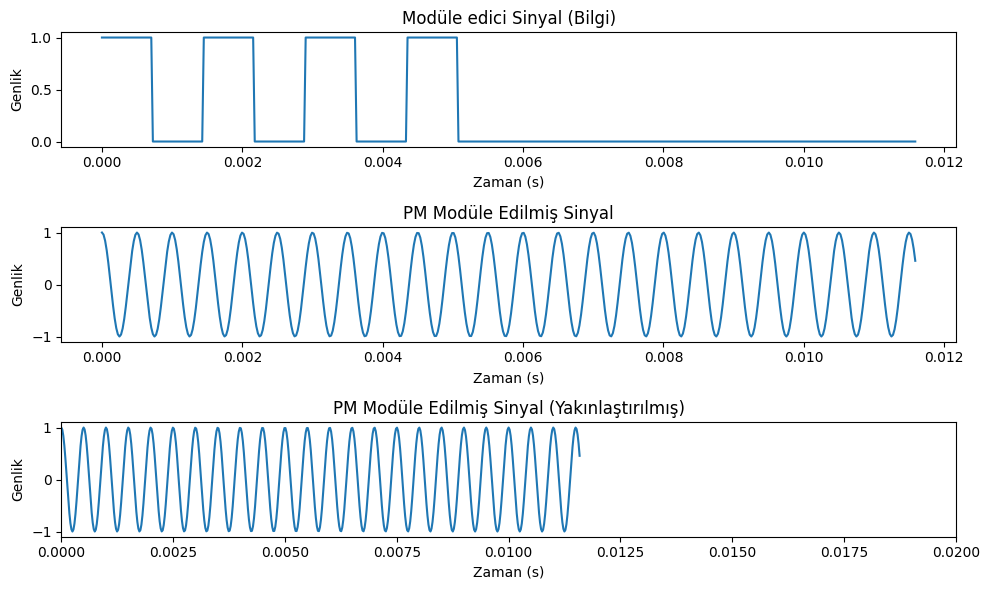

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kp = 2 * np.pi * 10  # Faz sapması (radyan)

# Modüle edilecek bilgiyi tanımla
data = [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

# Bilgiyi modüle edici sinyale dönüştür
m = np.zeros_like(t)
for i in range(len(data)):
    start_idx = int(i * chunk / len(data))
    end_idx = int((i + 1) * chunk / len(data))
    m[start_idx:end_idx] = data[i]

# PM modülasyonunu uygula
s = A * np.cos(2 * np.pi * fc * t + kp * m)  # Değişiklik burada

# Sinyalleri çiz
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, m)
plt.title('Modüle edici Sinyal (Bilgi)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(3, 1, 2)
plt.plot(t, s)
plt.title('PM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(3, 1, 3)
plt.plot(t, s)
plt.title('PM Modüle Edilmiş Sinyal (Yakınlaştırılmış)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')
plt.xlim(0, 0.02)  # İlk 20 ms'i yakınlaştır

plt.tight_layout()
plt.show()

In [44]:
import numpy as np
import pyaudio
import time

# Ses kayıt parametreleri
FORMAT = pyaudio.paInt16
CHANNELS = 1
CHUNK = 512
rate = 44100

# PM parametreleri
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
A = 1  # Taşıyıcı sinyal genliği
kp = 2 * np.pi * 10  # Faz sapması (radyan)

# PyAudio nesnesi oluştur
p = pyaudio.PyAudio()

# Çıkış akışını aç
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=rate,
    output=True,
    frames_per_buffer=CHUNK
)
pp=[]
def ses_gonder(bits, fc, kp, t, A):
    """
    Verilen bitleri PM modüle ederek ses cihazına gönderir.

    Args:
        bits: Gönderilecek bit dizisi.
        fc: Taşıyıcı sinyal frekansı (Hz).
        kp: Faz sapması (radyan).
        t: Zaman aralığı.
        A: Taşıyıcı sinyal genliği.
    """
    global pp
    m = np.repeat(bits, CHUNK // len(bits))  # Bitleri zaman aralığına göre genişlet

    # PM modülasyonunu uygula
    s = A * np.cos(2 * np.pi * fc * t + kp * m) * 32767
    pp=s

    # Modüle edilmiş dalgayı ses cihazına gönder
    stream.write(s.astype(np.int16).tobytes())

def onluk_binarye_cevir(onluk_sayi):
  """Verilen onluk sayıyı 16 bitlik bir binary diziye çevirir.

  Args:
      onluk_sayi: Dönüştürülecek onluk sayı.

  Returns:
      16 bitlik binary dizi (liste).
  """
  binary_dizi = np.array([int(bit) for bit in bin(onluk_sayi)[2:].zfill(16)])
  return binary_dizi

# Kullanım örneği:
t = np.arange(0, CHUNK/rate, 1/rate)  # Zaman aralığını tekrar tanımla
v = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=np.int16)
sayac = 0

for i in range(100):
    # v = onluk_binarye_cevir(i)  # Onluk sayıyı binary diziye çevir (LDPC olmadan)
    ses_gonder(v, fc, kp, t, A)  # Veriyi ses olarak gönder
    time.sleep(0.002)  # Biraz bekle

# Akışı kapat
stream.stop_stream()
stream.close()
p.terminate()

In [45]:
s=pp

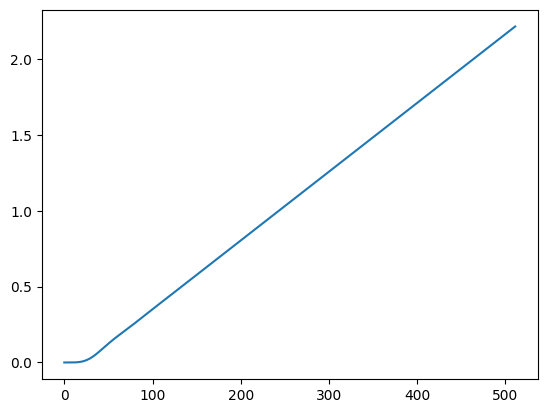

In [46]:
import numpy as np
from scipy.signal import hilbert, butter, lfilter

# PM parametreleri
kp = 2 * np.pi * 10  # Faz sapması (radyan)
RATE = 44100  # Örnekleme hızı

# Örnek modüle edilmiş sinyal (s)
#s = # ... (Modüle edilmiş sinyaliniz burada)

# Faz değişimini hesaplama
faz_degisim = np.unwrap(np.angle(hilbert(s)))

# Baz sinyali çıkarma
baz_sinyal = faz_degisim / kp

# İsteğe bağlı filtreleme (düşük geçiş filtresi)
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=5)
    y = lfilter(b, a, data)
    return y

kesme_frekansi = 1000 # Hz
filtrelenmiş_baz_sinyal = lowpass_filter(baz_sinyal, kesme_frekansi, RATE)

# Çıktı (filtrelenmiş baz sinyali)
plt.plot(filtrelenmiş_baz_sinyal)
plt.show()

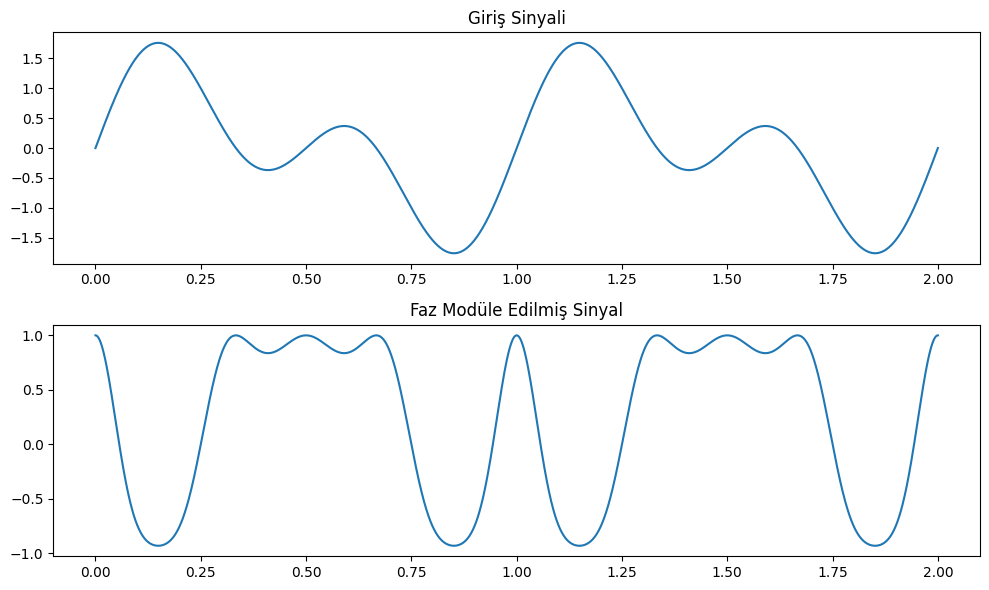

In [53]:
import numpy as np
from scipy.signal import hilbert

def pmmod(x, fc, fs, phasedev):
  """
  Faz modülasyonu uygulayan fonksiyon.

  Args:
    x: Modüle edilecek giriş sinyali (NumPy dizisi).
    fc: Taşıyıcı sinyal frekansı (Hz).
    fs: Örnekleme hızı (Hz).
    phasedev: Faz sapması (radyan cinsinden).

  Returns:
    Faz modüle edilmiş sinyal (NumPy dizisi).
  """

  t = np.arange(0, len(x) / fs, 1 / fs) # Zaman vektörü
  
  # Faz modülasyonu denklemi:
  y = np.exp(1j * (2 * np.pi * fc * t + phasedev * x))

  return y

# Örnek kullanımı
fs = 1000
t = np.arange(0, 2*fs+1) / fs
x = np.sin(2 * np.pi * t) + np.sin(4 * np.pi * t)

fc = 10000
phasedev = np.pi / 2

tx = pmmod(x, fc, fs, phasedev)

# Sonuçları çiz
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('Giriş Sinyali')

plt.subplot(2, 1, 2)
plt.plot(t, tx.real)
plt.title('Faz Modüle Edilmiş Sinyal')

plt.tight_layout()
plt.show()

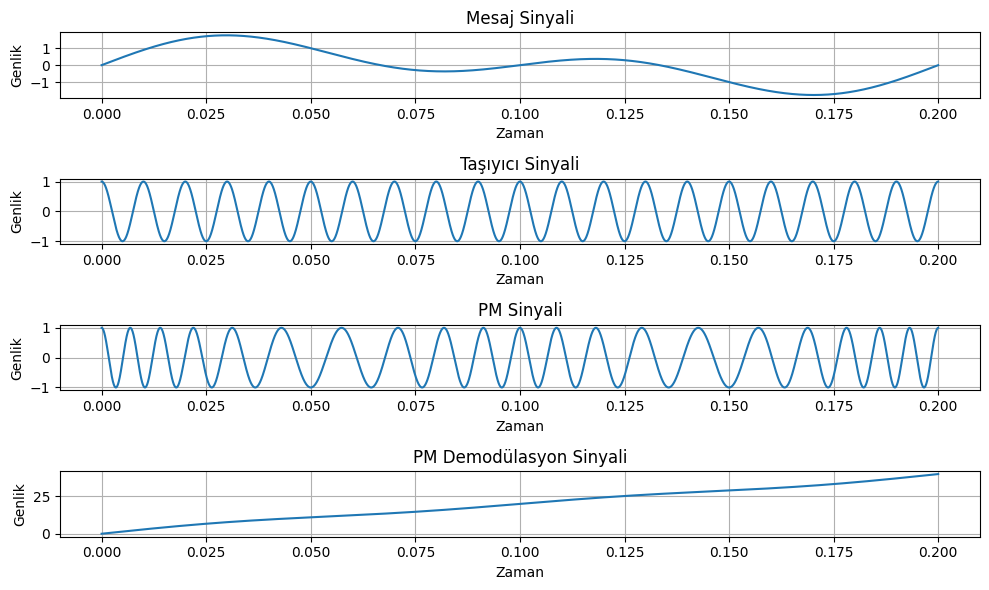

Veri başarıyla gönderildi!


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import time

# Parametreler
fs = 44100  # Örnekleme hızı (Hz)
fc = 100  # Taşıyıcı sinyal frekansı (Hz)
kp = np.pi  # Faz sapması (radyan)
A = 1  # Taşıyıcı sinyal genliği
duration = 0.2  # Sinyal süresi (saniye)
t = np.arange(0, duration, 1/fs)  # Zaman vektörü

# Mesaj sinyali
message_signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 10 * t)

# Taşıyıcı sinyal
carrier_signal = A * np.cos(2 * np.pi * fc * t)

# PM modülasyonu
pm_signal = A * np.cos(2 * np.pi * fc * t + kp * message_signal)

# PM demodülasyonu
phase_change = np.unwrap(np.angle(hilbert(pm_signal)))
demodulated_signal = phase_change / kp

# Grafik çizimi
plt.figure(figsize=(10, 6))

plt.subplot(4, 1, 1)
plt.plot(t, message_signal)
plt.title('Mesaj Sinyali')
plt.xlabel('Zaman')
plt.ylabel('Genlik')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(t, carrier_signal)
plt.title('Taşıyıcı Sinyali')
plt.xlabel('Zaman')
plt.ylabel('Genlik')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t, pm_signal)
plt.title('PM Sinyali')
plt.xlabel('Zaman')
plt.ylabel('Genlik')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(t, demodulated_signal)
plt.title('PM Demodülasyon Sinyali')
plt.xlabel('Zaman')
plt.ylabel('Genlik')
plt.grid(True)

plt.tight_layout()
plt.show()

# Ses olarak gönderme
# PyAudio nesnesi oluştur
p = pyaudio.PyAudio()

# Çıkış akışını aç
stream = p.open(
    format=pyaudio.paInt16,
    channels=1,
    rate=fs,
    output=True,
    frames_per_buffer=int(fs * 0.01)  # Her 10 ms'de bir gönder
)

# Verileri gönder

for i in range(int(duration * fs / (fs * 0.01))):
    stream.write(pm_signal[int(i * fs * 0.01):int((i + 1) * fs * 0.01)].astype(np.int16).tobytes())

# Akışı kapat
stream.stop_stream()
stream.close()
p.terminate()

print('Veri başarıyla gönderildi!')

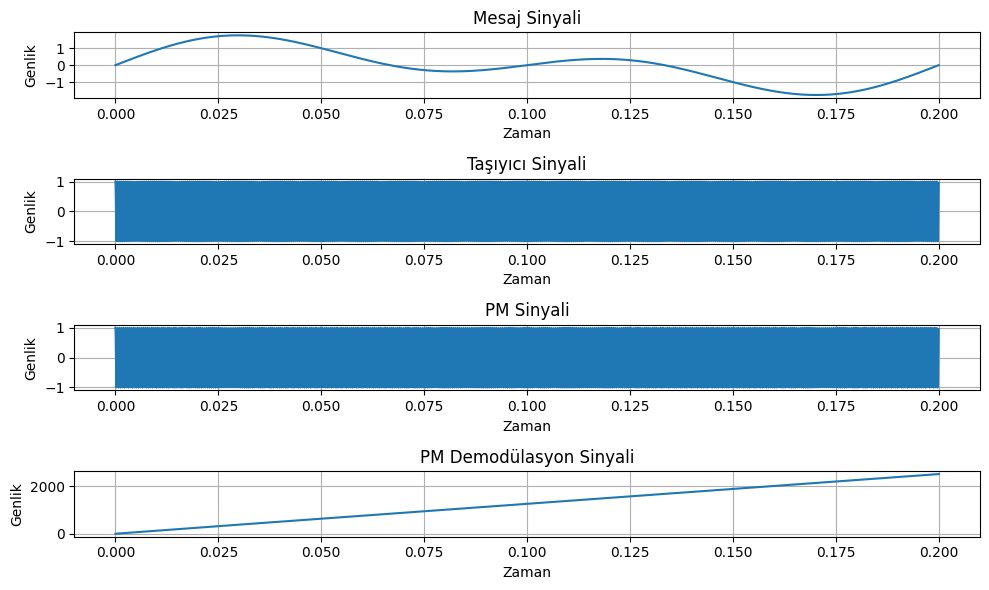

Veri başarıyla gönderildi!


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import time

# Parametreler
fs = 44100  # Örnekleme hızı (Hz)
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)  (Daha yüksek frekans)
kp = np.pi  # Faz sapması (radyan)
A = 1  # Taşıyıcı sinyal genliği
duration = 0.2  # Sinyal süresi (saniye)
t = np.arange(0, duration, 1/fs)  # Zaman vektörü

# Mesaj sinyali
message_signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 10 * t)

# Taşıyıcı sinyal
carrier_signal = A * np.cos(2 * np.pi * fc * t)

# PM modülasyonu
pm_signal = A * np.cos(2 * np.pi * fc * t + kp * message_signal)

# PM demodülasyonu
phase_change = np.unwrap(np.angle(hilbert(pm_signal)))
demodulated_signal = phase_change

# Grafik çizimi
plt.figure(figsize=(10, 6))

plt.subplot(4, 1, 1)
plt.plot(t, message_signal)
plt.title('Mesaj Sinyali')
plt.xlabel('Zaman')
plt.ylabel('Genlik')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(t, carrier_signal)
plt.title('Taşıyıcı Sinyali')
plt.xlabel('Zaman')
plt.ylabel('Genlik')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t, pm_signal)
plt.title('PM Sinyali')
plt.xlabel('Zaman')
plt.ylabel('Genlik')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(t, demodulated_signal)
plt.title('PM Demodülasyon Sinyali')
plt.xlabel('Zaman')
plt.ylabel('Genlik')
plt.grid(True)

plt.tight_layout()
plt.show()

# Ses olarak gönderme
# PyAudio nesnesi oluştur
p = pyaudio.PyAudio()

# Çıkış akışını aç
stream = p.open(
    format=pyaudio.paInt16,
    channels=1,
    rate=fs,
    output=True,
    frames_per_buffer=int(fs * 0.01)  # Her 10 ms'de bir gönder
)

# Verileri gönder
for i in range(int(duration * fs / (fs * 0.01))):
    # Ses sinyali için ölçekleme eklendi
    stream.write((pm_signal[int(i * fs * 0.01):int((i + 1) * fs * 0.01)] * 32767).astype(np.int16).tobytes())

# Akışı kapat
stream.stop_stream()
stream.close()
p.terminate()

print('Veri başarıyla gönderildi!')

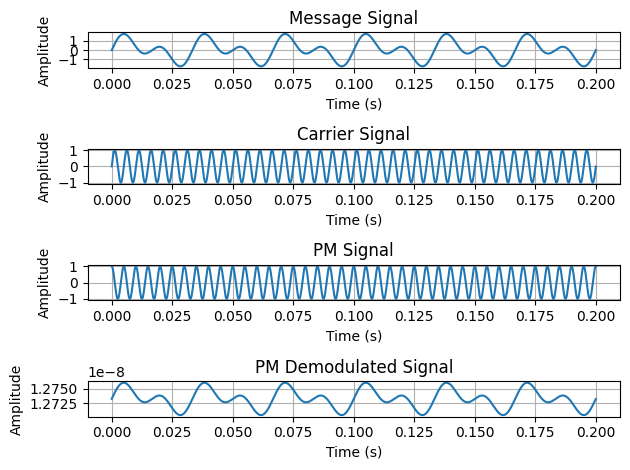

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Parametreleri belirle
fs = 100000
fc = 200
t = np.arange(0, 0.2, 1/fs)
phasedev = np.pi / 2

# İki tonlu sinüzoidal mesaj sinyalini oluştur
x = np.sin(2 * np.pi * 30 * t) + np.sin(2 * np.pi * 60 * t)

# Mesaj sinyalini çiz
plt.subplot(4, 1, 1)
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Message Signal')
plt.grid(True)

# Taşıyıcı sinyalini oluştur ve çiz
c = np.sin(2 * np.pi * fc * t)
plt.subplot(4, 1, 2)
plt.plot(t, c)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Carrier Signal')
plt.grid(True)

# Faz modülasyonu
def pmmod(x, fc, fs, phasedev):
    # Envelop sinyalini hesapla
    integral_of_x = np.cumsum(x) / fs
    return np.cos(2 * np.pi * fc * t + phasedev * integral_of_x)

# Modüle edilmiş sinyali oluştur ve çiz
y = pmmod(x, fc, fs, phasedev)
plt.subplot(4, 1, 3)
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('PM Signal')
plt.grid(True)

# Faz demodülasyonu
def pmdemod(y, fc, fs, phasedev):
    analytic_signal = hilbert(y)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    return np.diff(instantaneous_phase) / (phasedev * (2 * np.pi * fs))

# Demodüle edilmiş sinyali oluştur ve çiz
z = pmdemod(y, fc, fs, phasedev)
# Z'nin uzunluğu t'den bir eksik olacak, bu yüzden t'yi ayarlamamız gerekiyor
t_z = t[:-1]

plt.subplot(4, 1, 4)
plt.plot(t_z, z)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('PM Demodulated Signal')
plt.grid(True)

plt.tight_layout()
plt.show()


In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import time

# Parametreler
fs = 44100  # Örnekleme hızı (Hz)
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
kp = np.pi  # Faz sapması (radyan)
A = 1  # Taşıyıcı sinyal genliği
duration = 0.2  # Sinyal süresi (saniye)
t = np.arange(0, duration, 1/fs)  # Zaman vektörü

# 16 bitlik veri oluşturma
binary_data = np.random.choice([0, 1], size=16)  # Rastgele 16 bit
message = np.repeat(binary_data, int(fs * duration / len(binary_data)))

# Mesaj sinyalini oluştur
x = message * 2 - 1  # 0 ve 1'i -1 ve 1'e dönüştürmek

# Faz modülasyonu
def pmmod(x, fc, fs, phasedev):
    integral_of_x = np.cumsum(x) / fs
    return np.cos(2 * np.pi * fc * t + phasedev * integral_of_x)

# Modüle edilmiş sinyali oluştur
y = pmmod(x, fc, fs, phasedev)

# Ses olarak gönderme
# PyAudio nesnesi oluştur
p = pyaudio.PyAudio()

# Çıkış akışını aç
stream = p.open(
    format=pyaudio.paInt16,
    channels=1,
    rate=fs,
    output=True,
    frames_per_buffer=int(fs * 0.01)  # Her 10 ms'de bir gönder
)

# Verileri gönder
for i in range(int(duration * fs / (fs * 0.01))):
    stream.write((y[int(i * fs * 0.01):int((i + 1) * fs * 0.01)] * 32767).astype(np.int16).tobytes())

# Akışı kapat
stream.stop_stream()
stream.close()
p.terminate()

print('Veri başarıyla gönderildi!')

# Grafik çizimi (isteğe bağlı)
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, message)
plt.title('Mesaj Sinyali (16 Bit)')
plt.xlabel('Zaman')
plt.ylabel('Genlik')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, carrier_signal)
plt.title('Taşıyıcı Sinyali')
plt.xlabel('Zaman')
plt.ylabel('Genlik')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, y)
plt.title('PM Sinyali')
plt.xlabel('Zaman')
plt.ylabel('Genlik')
plt.grid(True)

plt.tight_layout()
plt.show()

ValueError: operands could not be broadcast together with shapes (8820,) (8816,) 

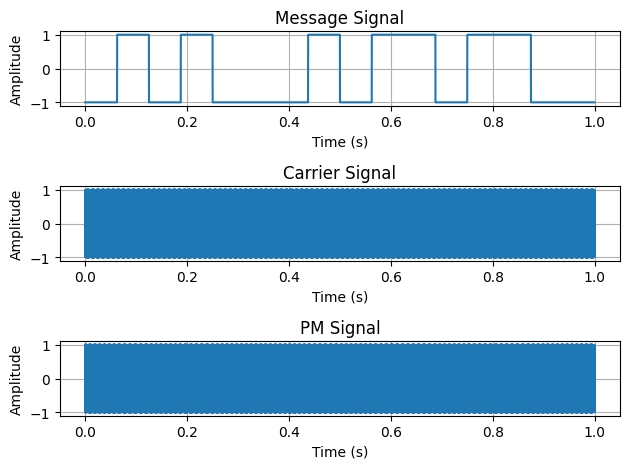

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun o

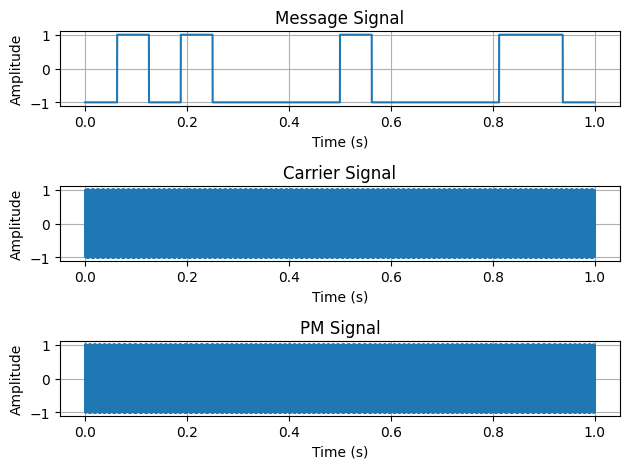

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun o

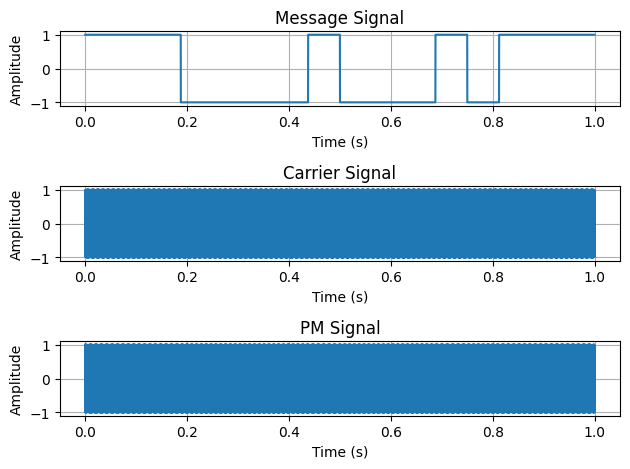

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


KeyboardInterrupt: 

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import time

# Parametreleri belirle
fs = 44100  # Ses kartı için yaygın kullanılan örnekleme frekansı
fc = 2000  # Taşıyıcı frekansı
phasedev = np.pi / 2
duration = 1.0  # Saniye cinsinden süre
interval = 5  # Saniye cinsinden gönderim aralığı

def generate_signal():
    # 16 bitlik 1'ler ve 0'lardan oluşan bilgi yükle
    binary_data = np.random.choice([0, 1], size=16)
    message = np.repeat(binary_data, int(fs * duration / len(binary_data)))

    t = np.arange(0, len(message)) / fs

    # Mesaj sinyalini oluştur
    x = message * 2 - 1  # 0 ve 1'i -1 ve 1'e dönüştürmek

    # Mesaj sinyalini çiz
    plt.subplot(3, 1, 1)
    plt.plot(t, x)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Message Signal')
    plt.grid(True)

    # Taşıyıcı sinyalini oluştur ve çiz
    c = np.sin(2 * np.pi * fc * t)
    plt.subplot(3, 1, 2)
    plt.plot(t, c)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Carrier Signal')
    plt.grid(True)

    # Faz modülasyonu
    def pmmod(x, fc, fs, phasedev):
        integral_of_x = np.cumsum(x) / fs
        return np.cos(2 * np.pi * fc * t + phasedev * integral_of_x)

    # Modüle edilmiş sinyali oluştur ve çiz
    y = pmmod(x, fc, fs, phasedev)
    plt.subplot(3, 1, 3)
    plt.plot(t, y)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('PM Signal')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return y

while True:
    # Sinyali oluştur ve hoparlörden çal
    y = generate_signal()
    sd.play(y, fs)
    sd.wait()  # Çalma işlemi bitene kadar bekle

    # Modüle edilmiş sinyali kaydet
    np.save("modulated_signal.npy", y)

    # Gönderim aralığı kadar bekle
    time.sleep(interval)
